In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.centrality.unique()

array(['degree', 'closeness', 'betweenness', 'clustering', 'random'],
      dtype=object)

In [6]:
df.columns

Index(['centrality', 'comunity', 'percentage', 'label', 'node'], dtype='object')

In [17]:
len(df.sort_values(['percentage']).loc[(df['label']==0)&(df['comunity']==1), 'percentage'].tolist())

100

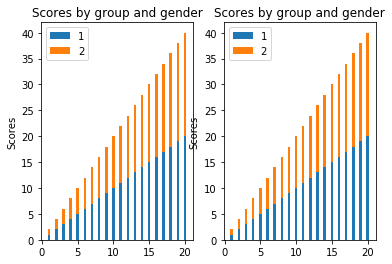

In [22]:
labels = df.sort_values(['percentage']).loc[df['label']==0, 'percentage'].unique()
men_means = df.sort_values(['percentage']).loc[(df['label']==0)&(df['comunity']==1)&(df['centrality']=='random'), 'percentage'].tolist()
women_means = df.sort_values(['percentage']).loc[(df['label']==0)&(df['comunity']==2)&(df['centrality']=='random'), 'percentage'].tolist()

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(1, 2)

ax[0].bar(labels, men_means, width,  label='1')
ax[0].bar(labels, women_means, width, bottom=men_means, label='2')

ax[0].set_ylabel('Scores')
ax[0].set_title('Scores by group and gender')
ax[0].legend()

ax[1].bar(labels, men_means, width,  label='1')
ax[1].bar(labels, women_means, width, bottom=men_means, label='2')

ax[1].set_ylabel('Scores')
ax[1].set_title('Scores by group and gender')
ax[1].legend()
plt.show()

/home/thiagosato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


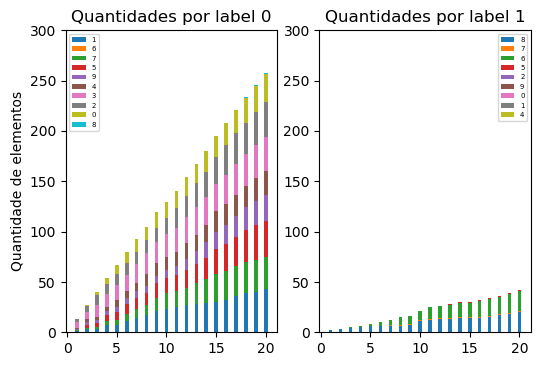

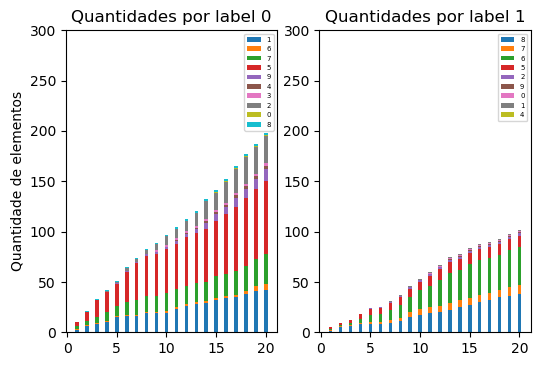

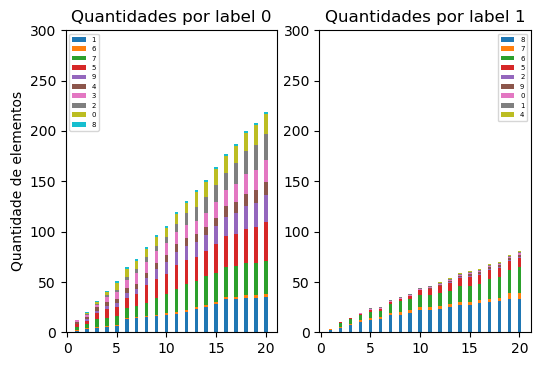

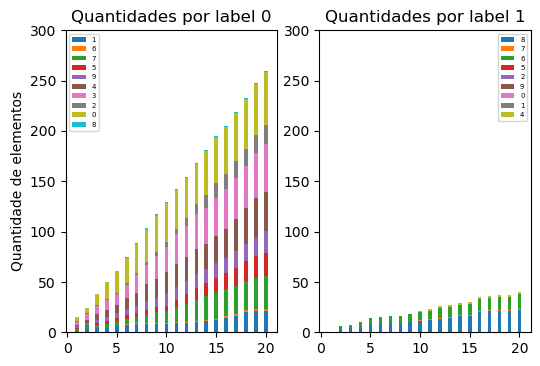

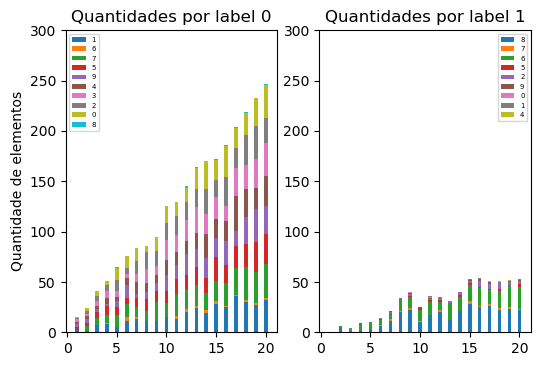

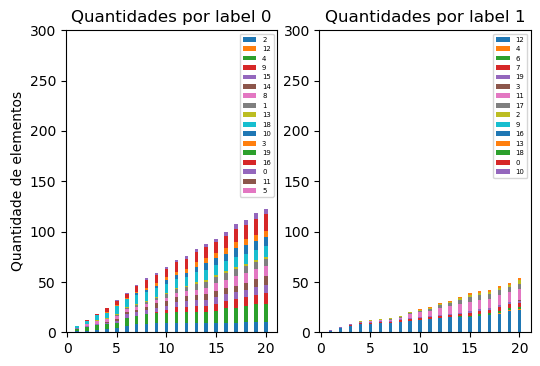

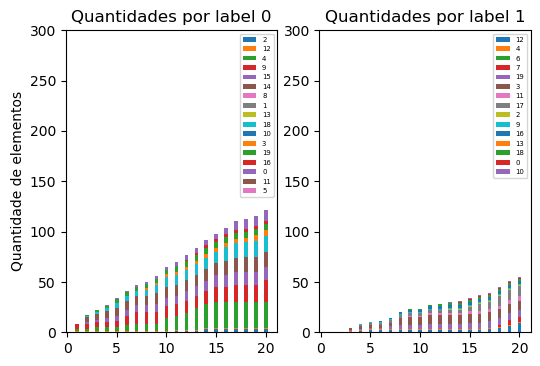

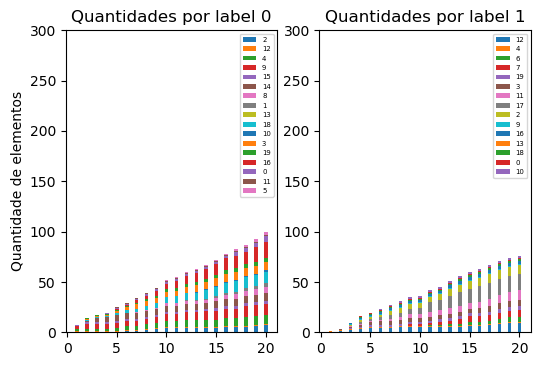

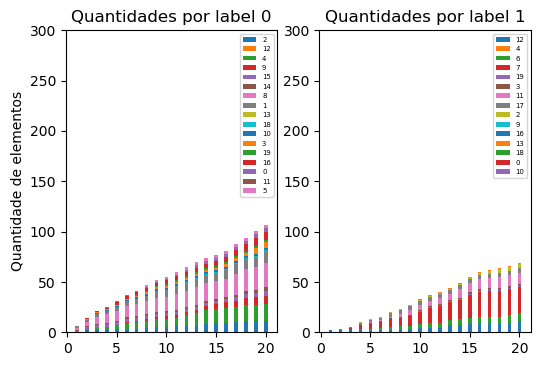

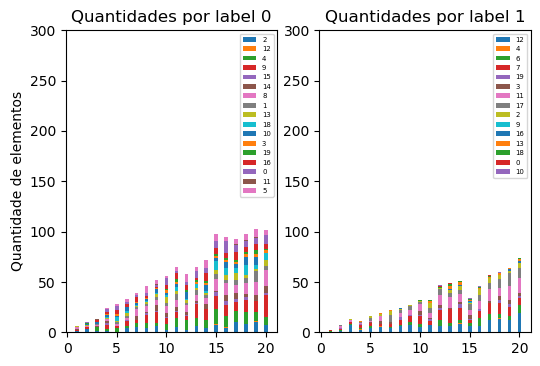

In [ ]:
width = 0.35
for dataset in ['USPS','COIL','g241c','g241n','digits']:
    df = pd.read_csv('comunities/csv/comunity_'+dataset+'_scores.csv')
    df['percentage'] = 100*df['percentage']
    df['percentage'] = df['percentage'].astype('int64')
    
    for centrality in df.centrality.unique():
        fig, ax = plt.subplots(1, 2)
        plt.figsize=(20,10)
        ax[0].set_ylabel('Quantidade de elementos')
        for label in [0, 1]:
            df_label = df[df['label']==label].sort_values(['percentage'])

            node_array = np.zeros(len(df_label.percentage.unique()))

            first_array = True
            
            ax[label].set_title('Quantidades por label '+str(label))
            for comunity in df_label.comunity.unique():

                perc = pd.DataFrame(df_label.percentage.unique(), columns = ['percentage'])
                query = (df_label['label']==label) &(df_label['comunity']==comunity) &(df_label['centrality']==centrality)
                df_perc = df_label[query][['percentage', 'node']]

                df_plot = perc.merge(df_perc, how='left', 
                            left_on='percentage', 
                            right_on='percentage').fillna(0)
                df_plot = df_plot.sort_values(['percentage'])

                if first_array:
                    first_array = False
                    ax[label].bar(df_label.percentage.unique(), df_plot['node'].array , width,  label=str(comunity))
                else:
                    ax[label].bar(df_label.percentage.unique(), df_plot['node'].array , width, bottom=node_array, label=str(comunity))
                node_array = df_plot['node'].array + node_array
            ax[label].legend(prop={'size':5})
            ax[label].set_ylim(top=300)
        fig.set_dpi(100)
        fig.savefig('comunities/results/'+dataset+'_'+centrality+'_graphic.png')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])